In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
img = cv2.imread('CavePainting.jpg') # READS IN NUMPY ARRAY

(453, 676, 3)


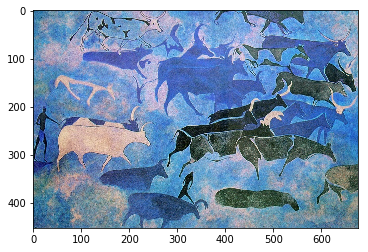

In [3]:
# display the image
h,w = img.shape[:2]
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()
# what happened?

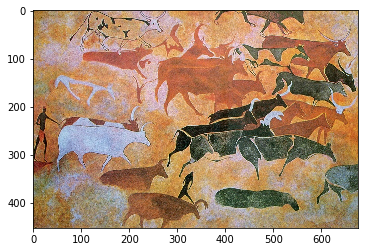

In [4]:
# BGR <--> RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

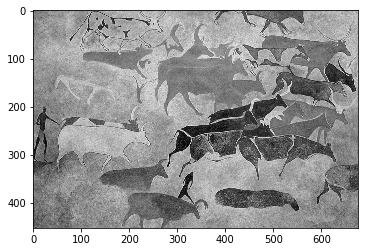

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

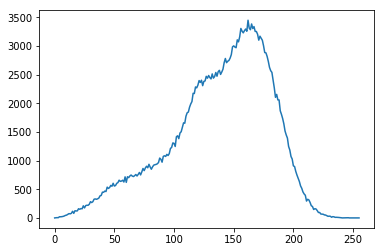

In [6]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist)

In [7]:
# let's make a function
def imshowBGR2RGB(im):
    img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    return

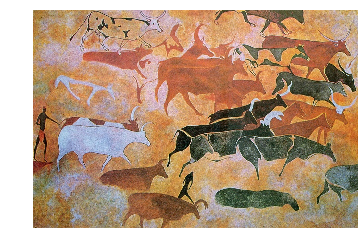

In [8]:
imshowBGR2RGB(img)

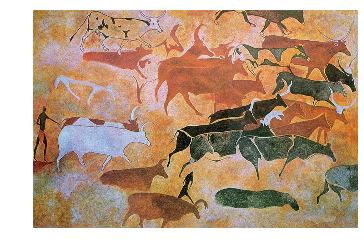

In [9]:
# scaling 
rows, cols = img.shape[:2]
res = cv2.resize(img, (2*cols, 2*rows), interpolation = cv2.INTER_CUBIC)
imshowBGR2RGB(res)

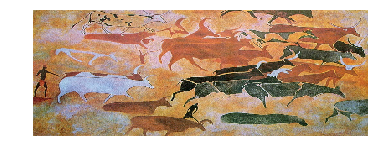

In [10]:
# scaling 
res = cv2.resize(img,(400, 150), interpolation = cv2.INTER_CUBIC)
imshowBGR2RGB(res)

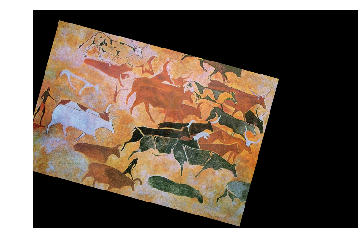

In [11]:
# rotate (centre, angle, scale)
M = cv2.getRotationMatrix2D((100, 120), -15, .7)
dst = cv2.warpAffine(img, M, (cols,rows))
imshowBGR2RGB(dst)

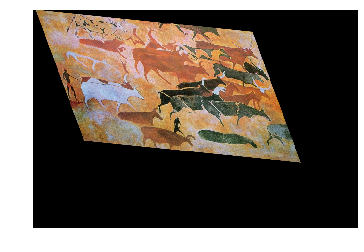

In [12]:
# affine transformation
pts1 = np.float32([[5,5],[5,50],[50,5]])
pts2 = np.float32([[10,3],[20,30],[40,6]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

imshowBGR2RGB(dst)

In [13]:
# perspective transformation

# getPerspectiveTransform

# how many point matches do we need?

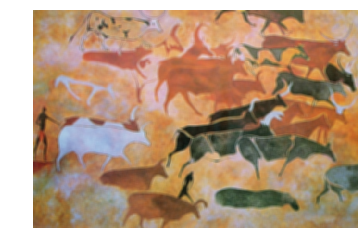

In [14]:
# averaging

kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

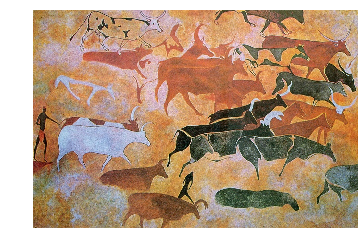

In [15]:
# compare with the original
imshowBGR2RGB(img)

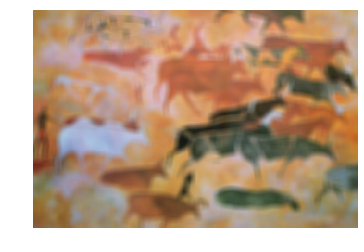

In [16]:
# larger window
kernel = np.ones((15,15),np.float32)/225
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

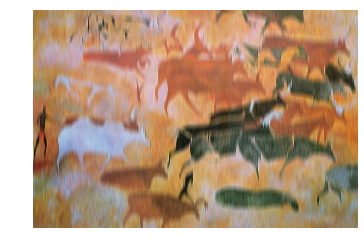

In [17]:
# Gaussian blur
kernel = cv2.getGaussianKernel(15, 9)

dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

# alternative: GaussianBlur(img,(15,15),20) 

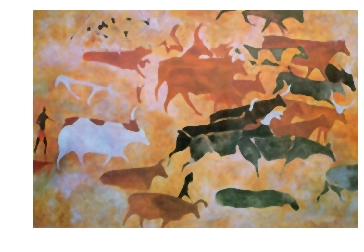

In [18]:
median = cv2.medianBlur(img, 7)
imshowBGR2RGB(median)

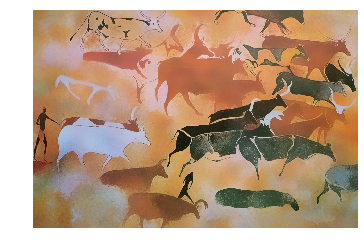

In [19]:
# spacitally and color-wise grouping => gives a cartoony feel
blur = cv2.bilateralFilter(img,30,75,75)
imshowBGR2RGB(blur)

(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

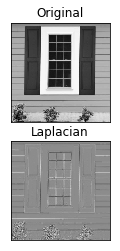

In [20]:
# image gradients
img = cv2.imread('window.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
#imshowBGR2RGB(laplacian)


plt.subplot(2,1,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

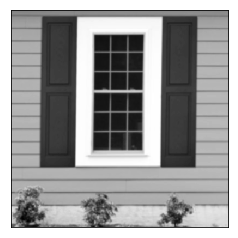

In [21]:
#median = cv2.medianBlur(gray, 5)
blur = cv2.GaussianBlur(gray,(5,5),1)
plt.imshow(blur, cmap = 'gray')
plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

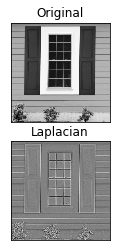

In [22]:
# smooth first

laplacian = cv2.Laplacian(blur, cv2.CV_64F)

plt.subplot(2,1,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

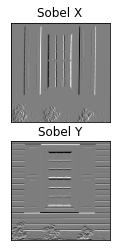

In [23]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)

plt.subplot(2,1,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


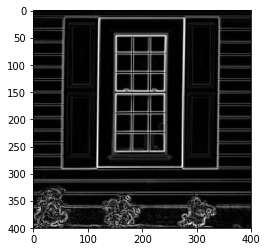

In [24]:
sobel_xy = abs(sobelx) + abs(sobely);
plt.imshow(sobel_xy,cmap='gray')

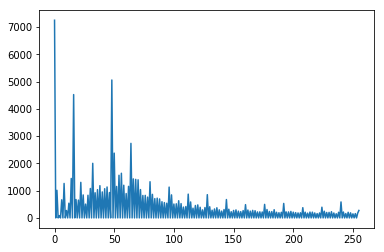

In [25]:
hist,bins = np.histogram(sobel_xy,256,[0,256])
plt.plot(hist)

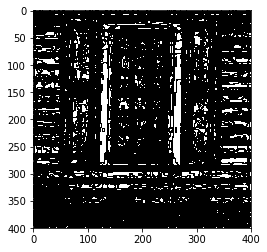

In [26]:
th = sobel_xy < 20
plt.imshow(th, cmap='gray')

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

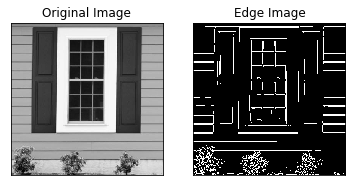

In [27]:
# edges (Canny)
edges = cv2.Canny(gray, 75, 100)

plt.subplot(1, 2, 1),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2, 2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

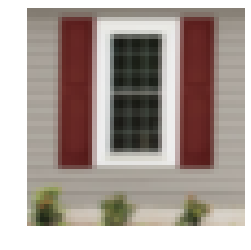

In [28]:
lowres = cv2.pyrDown(img)
lowres = cv2.pyrDown(lowres)
lowres = cv2.pyrDown(lowres)
imshowBGR2RGB(lowres)

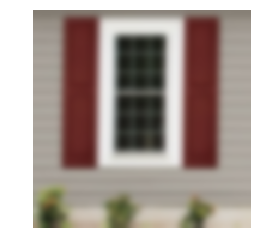

In [29]:
highres = cv2.pyrUp(lowres)
highres = cv2.pyrUp(highres)
highres = cv2.pyrUp(highres)
imshowBGR2RGB(highres)

**more:** [OpenCV-Python Tutorials](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)
